In [46]:
# Data manipulation
import pandas as pd
import numpy as np
import time
import random
import string
# Data visualization
import matplotlib.pyplot as plt

# Model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score
)

# System and warnings
import warnings
warnings.filterwarnings("ignore")

# Display settings for clarity
pd.set_option('display.max_columns', None)

In [47]:
# Load the datasets into DataFrames
main_claim_df = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Train-1542865627584.csv")
beneficiary_df = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Train_Beneficiarydata-1542865627584.csv")
inpatient_df = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Train_Inpatientdata-1542865627584.csv")
outpatient_df = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Train_Outpatientdata-1542865627584.csv")

# Display top rows to confirm successful loading
print("Main Claim Data:")
display(main_claim_df.head())

print("Beneficiary Data:")
display(beneficiary_df.head())

print("Inpatient Data:")
display(inpatient_df.head())

print("Outpatient Data:")
display(outpatient_df.head())

# Check data shapes for clarity
print(f"Main Claim Shape: {main_claim_df.shape}")  #(row , column)
print(f"Beneficiary Shape: {beneficiary_df.shape}") #(row , column)
print(f"Inpatient Shape: {inpatient_df.shape}") #(row , column)
print(f"Outpatient Shape: {outpatient_df.shape}") #(row , column)

Main Claim Data:


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


Beneficiary Data:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


Inpatient Data:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


Outpatient Data:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


Main Claim Shape: (5410, 2)
Beneficiary Shape: (138556, 25)
Inpatient Shape: (40474, 30)
Outpatient Shape: (517737, 27)


In [48]:
#Exploratory Data Analysis (EDA)

In [49]:
def explore(df, name):
    print(f"\n🔹 {name} Info")
    print(df.info())
    print(f"\n🔹 {name} Summary Statistics")
    print(df.describe(include='all').transpose())
    print(f"\n🔹 {name} Null Value Counts")
    print(df.isnull().sum())

# EDA for each dataset
# explore(main_claim_df, "Main Claim Data")
# explore(beneficiary_df, "Beneficiary Data")
# explore(inpatient_df, "Inpatient Data")
# explore(outpatient_df, "Outpatient Data")

# Optional: Check target class distribution
# print("\n🎯 PotentialFraud Distribution:")
# print(main_claim_df['PotentialFraud'].value_counts(normalize=True))

In [50]:
print("Check Target Variable Distribution")
print(main_claim_df['PotentialFraud'].value_counts())

Check Target Variable Distribution
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64


In [51]:
# Function to display missing values
def missing_summary(df, name):
    print(f"\n🔸 Missing Values in {name}:")
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    if not missing.empty:
        print(missing)
    else:
        print("No missing values.")

# Apply to each dataset
missing_summary(main_claim_df, "Main Claim Data")
missing_summary(beneficiary_df, "Beneficiary Data")
missing_summary(inpatient_df, "Inpatient Data")
missing_summary(outpatient_df, "Outpatient Data")


🔸 Missing Values in Main Claim Data:
No missing values.

🔸 Missing Values in Beneficiary Data:
DOD    137135
dtype: int64

🔸 Missing Values in Inpatient Data:
ClmProcedureCode_6     40474
ClmProcedureCode_5     40465
ClmProcedureCode_4     40358
ClmProcedureCode_3     39509
ClmDiagnosisCode_10    36547
OtherPhysician         35784
ClmProcedureCode_2     35020
ClmProcedureCode_1     17326
OperatingPhysician     16644
ClmDiagnosisCode_9     13497
ClmDiagnosisCode_8      9942
ClmDiagnosisCode_7      7258
ClmDiagnosisCode_6      4838
ClmDiagnosisCode_5      2894
ClmDiagnosisCode_4      1534
DeductibleAmtPaid        899
ClmDiagnosisCode_3       676
ClmDiagnosisCode_2       226
AttendingPhysician       112
dtype: int64

🔸 Missing Values in Outpatient Data:
ClmProcedureCode_6       517737
ClmProcedureCode_5       517737
ClmProcedureCode_4       517735
ClmProcedureCode_3       517733
ClmProcedureCode_2       517701
ClmProcedureCode_1       517575
ClmDiagnosisCode_10      516654
ClmDiagnosisCo

In [52]:
# Exploratory Data Analysis (EDA) for the main_claim_df

In [53]:
#Basic info
print("🔹 Dataset Info:")
print(main_claim_df.info())

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB
None


In [54]:
# Preview of Data
print("\n🔹 First 5 Rows:")
print(main_claim_df.head())


🔹 First 5 Rows:
   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No


In [55]:
# Value counts for PotentialFraud
print("\n fraud level distribution")
print(main_claim_df['PotentialFraud'].value_counts())


 fraud level distribution
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64


In [56]:
print("\n Fraud Label Distribution (Normalized):")
print(main_claim_df['PotentialFraud'].value_counts(normalize=True))


 Fraud Label Distribution (Normalized):
PotentialFraud
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64


In [57]:
#Check unique providers
print(f"\n Unique Providers: {main_claim_df['Provider'].nunique()}")


 Unique Providers: 5410


In [58]:
# Check for duplicate providers (if any)
duplicates = main_claim_df.duplicated(subset=['Provider']).sum()
print(f"\n Duplicate Provider Entries: {duplicates}")


 Duplicate Provider Entries: 0


In [59]:
# Missing values
print("\n Missing Values:")
print(main_claim_df.isnull().sum())


 Missing Values:
Provider          0
PotentialFraud    0
dtype: int64


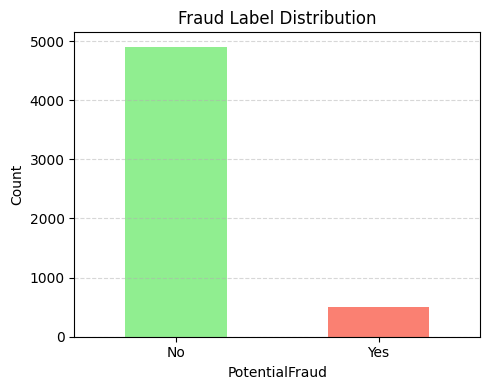

In [60]:
# Encode 'PotentialFraud' as numeric label
main_claim_df['FraudLabel'] = main_claim_df['PotentialFraud'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(5,4))
main_claim_df['PotentialFraud'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title("Fraud Label Distribution")
plt.xlabel("PotentialFraud")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [61]:
# Exploratory Data Analysis (EDA) - Beneficiary Data

In [62]:
# Basic info
print("🔹 Dataset Info:")
print(beneficiary_df.info())

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  

In [63]:
# Preview of the data
print("\n🔹 First 5 Rows:")
print(beneficiary_df.head())


🔹 First 5 Rows:
      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  C

In [64]:
# Check for missing values
print("\n Missing Values:")
print(beneficiary_df.isnull().sum())


 Missing Values:
BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimburs

In [65]:
# Check number of unique beneficiaries
print(f"\n Unique Beneficiaries: {beneficiary_df['BeneID'].nunique()}")


 Unique Beneficiaries: 138556



 Gender Distribution:
Gender
2    79106
1    59450
Name: count, dtype: int64


Text(0, 0.5, 'Count')

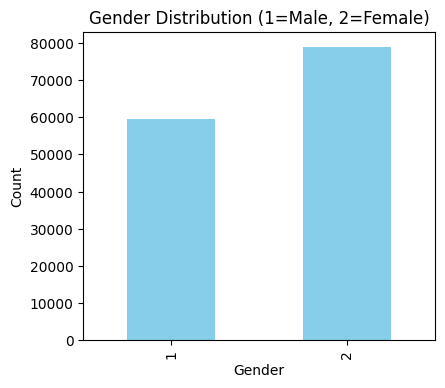

In [71]:
# Gender distribution
print("\n Gender Distribution:")
print(beneficiary_df['Gender'].value_counts())
gender_counts = beneficiary_df['Gender'].value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender Distribution (1=Male, 2=Female)')
plt.xlabel('Gender')
plt.ylabel('Count')


 Race Distribution:
Race
1    117057
2     13538
3      5059
5      2902
Name: count, dtype: int64


Text(0, 0.5, 'Count')

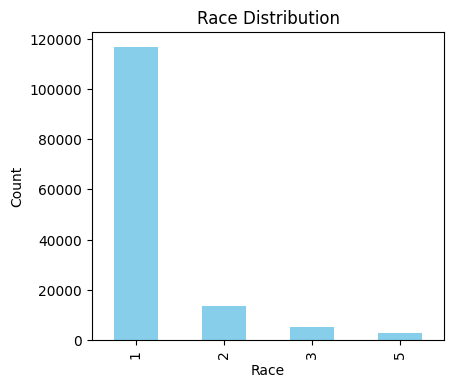

In [74]:
# Race distribution
print("\n Race Distribution:")
print(beneficiary_df['Race'].value_counts())
race_counts = beneficiary_df['Race'].value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
race_counts.plot(kind='bar', color='skyblue')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')

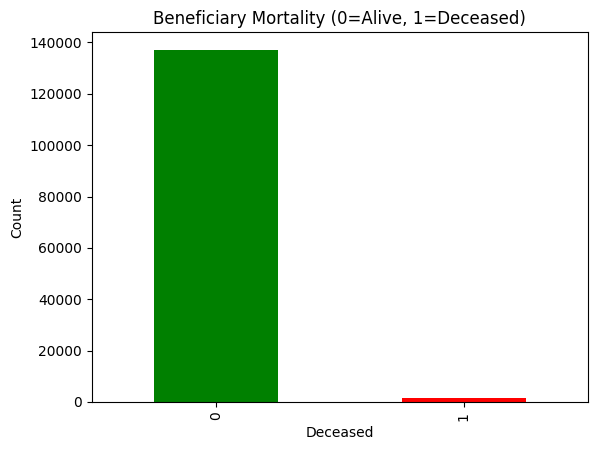

In [82]:
#Mortality Analysis (DOD column)
beneficiary_df['Deceased'] = beneficiary_df['DOD'].notnull().astype(int)
deceased_counts = beneficiary_df['Deceased'].value_counts()
deceased_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Beneficiary Mortality (0=Alive, 1=Deceased)')
plt.xlabel('Deceased')
plt.ylabel('Count')
plt.show()

In [86]:
# Annual Reimbursement and Deductible
print("\n Reimbursement and Deductible Summary:")
print(beneficiary_df[['IPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt',
                      'IPAnnualDeductibleAmt', 'OPAnnualDeductibleAmt']].describe())


 Reimbursement and Deductible Summary:
       IPAnnualReimbursementAmt  OPAnnualReimbursementAmt  \
count             138556.000000             138556.000000   
mean                3660.346502               1298.219348   
std                 9568.621827               2493.901134   
min                -8000.000000                -70.000000   
25%                    0.000000                170.000000   
50%                    0.000000                570.000000   
75%                 2280.000000               1500.000000   
max               161470.000000             102960.000000   

       IPAnnualDeductibleAmt  OPAnnualDeductibleAmt  
count          138556.000000          138556.000000  
mean              399.847296             377.718258  
std               956.175202             645.530187  
min                 0.000000               0.000000  
25%                 0.000000              40.000000  
50%                 0.000000             170.000000  
75%              1068.000000    

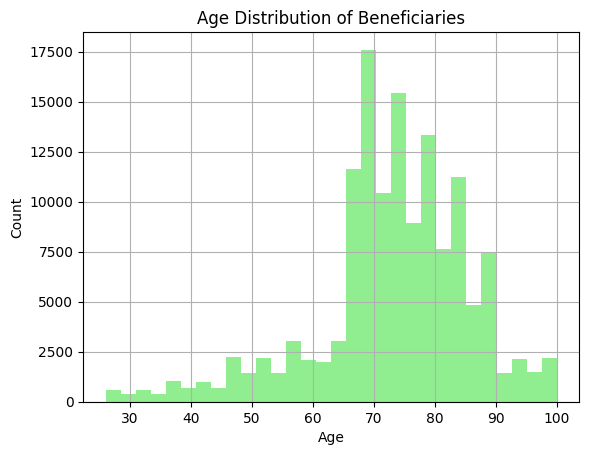

In [87]:
# Age Distribution
beneficiary_df['DOB'] = pd.to_datetime(beneficiary_df['DOB'], errors='coerce')
beneficiary_df['Age'] = 2009 - beneficiary_df['DOB'].dt.year  # using 2009 as reference year
beneficiary_df['Age'].hist(bins=30, color='lightgreen')
plt.title('Age Distribution of Beneficiaries')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [88]:
# Chronic Conditions Overview
chronic_cols = [col for col in beneficiary_df.columns if col.startswith('ChronicCond_')]
print("\n Chronic Condition Coverage (% with condition):")
print(beneficiary_df[chronic_cols].apply(lambda col: (col == 1).mean()).sort_values(ascending=False))


 Chronic Condition Coverage (% with condition):
ChronicCond_IschemicHeart          0.675857
ChronicCond_Diabetes               0.601858
ChronicCond_Heartfailure           0.493678
ChronicCond_Depression             0.355524
ChronicCond_Alzheimer              0.332183
ChronicCond_KidneyDisease          0.312357
ChronicCond_Osteoporasis           0.274683
ChronicCond_rheumatoidarthritis    0.256820
ChronicCond_ObstrPulmonary         0.237153
ChronicCond_Cancer                 0.119959
ChronicCond_stroke                 0.079058
dtype: float64


In [89]:
chronic_cols = [col for col in beneficiary_df.columns if 'ChronicCond' in col]
print("\n Chronic Condition Distributions:")
for col in chronic_cols:
    print(f"\n{col} Value Counts:\n{beneficiary_df[col].value_counts()}")


 Chronic Condition Distributions:

ChronicCond_Alzheimer Value Counts:
ChronicCond_Alzheimer
2    92530
1    46026
Name: count, dtype: int64

ChronicCond_Heartfailure Value Counts:
ChronicCond_Heartfailure
2    70154
1    68402
Name: count, dtype: int64

ChronicCond_KidneyDisease Value Counts:
ChronicCond_KidneyDisease
2    95277
1    43279
Name: count, dtype: int64

ChronicCond_Cancer Value Counts:
ChronicCond_Cancer
2    121935
1     16621
Name: count, dtype: int64

ChronicCond_ObstrPulmonary Value Counts:
ChronicCond_ObstrPulmonary
2    105697
1     32859
Name: count, dtype: int64

ChronicCond_Depression Value Counts:
ChronicCond_Depression
2    89296
1    49260
Name: count, dtype: int64

ChronicCond_Diabetes Value Counts:
ChronicCond_Diabetes
1    83391
2    55165
Name: count, dtype: int64

ChronicCond_IschemicHeart Value Counts:
ChronicCond_IschemicHeart
1    93644
2    44912
Name: count, dtype: int64

ChronicCond_Osteoporasis Value Counts:
ChronicCond_Osteoporasis
2    100497
1 

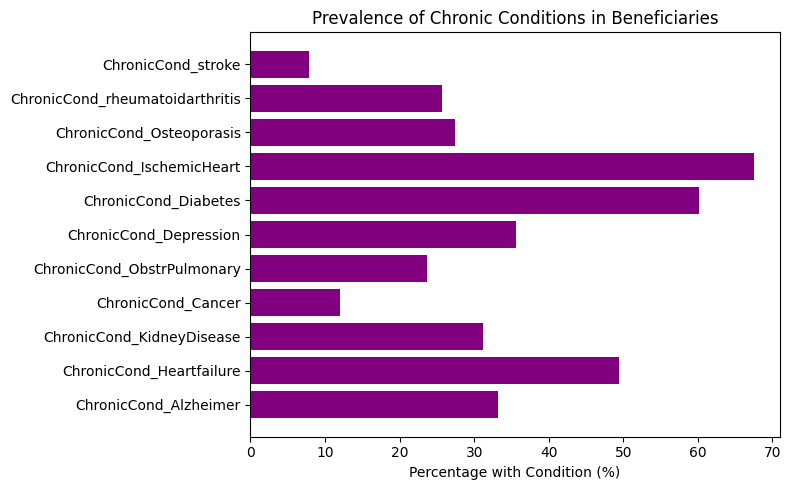

In [90]:
# Bar plot for % with each condition
chronic_percentages = {}
for col in chronic_cols:
    chronic_percentages[col] = (beneficiary_df[col] == 1).mean() * 100
plt.figure(figsize=(8,5))
plt.barh(list(chronic_percentages.keys()), list(chronic_percentages.values()), color='purple')
plt.xlabel('Percentage with Condition (%)')
plt.title('Prevalence of Chronic Conditions in Beneficiaries')
plt.tight_layout()
plt.show()

In [91]:
# Exploratory Data Analysis (EDA) - Inpatient Data

In [92]:
# Dataset Info
print("Dataset Info:")
print(inpatient_df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      